# Proyecto Final de Maestria - Clasificacion - v2
## Imputacion de Datos mediante Metodos Estadisticos, Aprendizaje Automatico y Aprendizaje Profundo

## Conjunto de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris(as_frame=True).frame
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [2]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

## Preparacion de los datos

In [3]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
y = data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Imputacion

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
import missingno as msno
import matplotlib.pyplot as plt

per_null_values = map(lambda x: x/100, range(5, 50, 5))
var_name = 'target'
random_seed = 1
results = []
df_null = pd.DataFrame()

for per_null in per_null_values:
    times = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=per_null, random_state=random_seed)
    #recopilacion de columnas con valores nulos
    missing_data = data.copy()
    missing_data.loc[y_test.index, var_name] = np.nan
    df_null[f'{str(per_null)}'] = missing_data[var_name] 

    #imputacion mediante metodos estadisticos
    mean = y_train.mean()
    start_time = time()
    y_pred_mean = pd.Series(data=mean, index=y_test.index, name=var_name, dtype=int)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
    
    median = y_train.median()
    start_time = time()
    y_pred_median = pd.Series(data=median, index=y_test.index, name=var_name, dtype=int)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
    
    max_freq = y_train.value_counts().idxmax()
    start_time = time()
    y_pred_max_freq = pd.Series(data=max_freq, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
   
    #imputacion mediante metodos de aprendizaje automatico
    lm = LogisticRegression()
    lm.fit(X_train, y_train)
    start_time = time()
    y_pred_logreg = lm.predict(X_test)
    y_pred_logreg = pd.Series(data=y_pred_logreg, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    start_time = time()
    y_pred_supvec = svc.predict(X_test)
    y_pred_supvec = pd.Series(data=y_pred_supvec, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
    
    dtc = tree.DecisionTreeClassifier(random_state=random_seed)
    dtc.fit(X_train, y_train)
    start_time = time()
    y_pred_dectre = dtc.predict(X_test)
    y_pred_dectre = pd.Series(data=y_pred_dectre, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)
    

    rfc = RandomForestClassifier(random_state=random_seed)
    rfc.fit(X_train, y_train)
    start_time = time()
    y_pred_ranfor = rfc.predict(X_test)
    y_pred_ranfor = pd.Series(data=y_pred_ranfor, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    #imputacion mediante metodos de aprendizaje profundo
    ann = MLPClassifier(random_state=random_seed)
    ann.fit(X_train, y_train)
    start_time = time()
    y_pred_artneu = ann.predict(X_test)
    y_pred_artneu = pd.Series(data=y_pred_artneu, index=y_test.index, name=var_name)
    end_time = time()
    duration = end_time - start_time
    times.append(duration)

    methods = ['Media', 'Mediana', 'Maxima Frecuencia',
               'Regresion logistica', 'Maquina de Vector de Soporte', 'Arbol de Decision',
               'Bosque Aleatorio', 'Red Neuronal Artificial']
    y_pred = [y_pred_mean, y_pred_median, y_pred_max_freq,
              y_pred_logreg, y_pred_supvec, y_pred_dectre,
              y_pred_ranfor, y_pred_artneu]

    for index, method in enumerate(methods):
        results.append({
            'Porcentaje de Nulos' : per_null,
            'Metodo': method,
            'Precision': round(accuracy_score(y_test, y_pred[index])*100, 2),
            'Duracion' : times[index]})

results = pd.DataFrame(results) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

## Resultados

In [6]:
results

Porcentaje de Nulos                        Metodo  Precision  Duracion
0                  0.05                         Media      37.50  0.000844
1                  0.05                       Mediana      37.50  0.000236
2                  0.05             Maxima Frecuencia      25.00  0.000522
3                  0.05           Regresion logistica     100.00  0.003206
4                  0.05  Maquina de Vector de Soporte     100.00  0.003171
..                  ...                           ...        ...       ...
67                 0.45           Regresion logistica      97.06  0.004917
68                 0.45  Maquina de Vector de Soporte      98.53  0.003697
69                 0.45             Arbol de Decision      97.06  0.002678
70                 0.45              Bosque Aleatorio      97.06  0.076567
71                 0.45       Red Neuronal Artificial      97.06  0.012994

[72 rows x 4 columns]

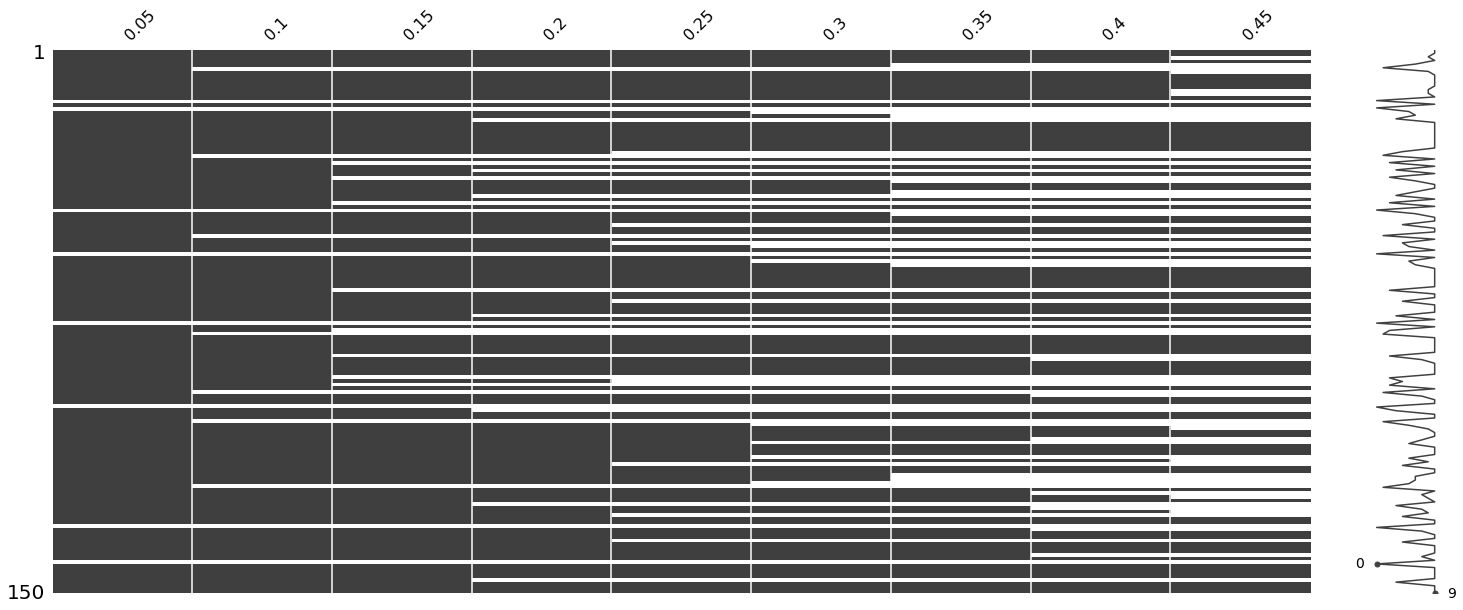

In [7]:
msno.matrix(df_null)
plt.savefig('classification_missing.eps')
plt.show()

### Precision

In [8]:
classification_results = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='Precision')
classification_results

Metodo               Arbol de Decision  Bosque Aleatorio  \
Porcentaje de Nulos                                        
0.05                            100.00            100.00   
0.10                            100.00            100.00   
0.15                             95.65             95.65   
0.20                             96.67             96.67   
0.25                             97.37             97.37   
0.30                             95.56             95.56   
0.35                             96.23             96.23   
0.40                             96.67             96.67   
0.45                             97.06             97.06   

Metodo               Maquina de Vector de Soporte  Maxima Frecuencia  Media  \
Porcentaje de Nulos                                                           
0.05                                       100.00              25.00  37.50   
0.10                                       100.00              26.67  40.00   
0.15                                        95.65              17.39  47.83   
0.20                                        96.67              20.00  43.33   
0.25                                        97.37              23.68  42.11   
0.30                                        97.78              28.89  40.00   
0.35                                        98.11              28.30  35.85   
0.40                                        98.33              31.67  31.67   
0.45                                        98.53              30.88  33.82   

Metodo               Mediana  Red Neuronal Artificial  Regresion logistica  
Porcentaje de Nulos                                                         
0.05                   37.50                   100.00               100.00  
0.10                   40.00                   100.00               100.00  
0.15                   47.83                    82.61                95.65  
0.20                   43.33                    86.67                96.67  
0.25                   42.11                    89.47                97.37  
0.30                   40.00                    91.11                97.78  
0.35                   35.85                    94.34                98.11  
0.40                   35.00                    95.00                96.67  
0.45                   30.88                    97.06                97.06

In [ ]:
classification_results.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Precision')
plt.savefig('classification_results.eps')

### Tiempo de ejecucion

In [ ]:
classification_times = results.pivot(index='Porcentaje de Nulos', columns='Metodo', values='Duracion')
classification_times

Metodo               Arbol de Decision  Bosque Aleatorio  \
Porcentaje de Nulos                                        
0.05                          0.001142          0.018218   
0.10                          0.001053          0.011215   
0.15                          0.001072          0.011154   
0.20                          0.001076          0.011035   
0.25                          0.001093          0.013253   
0.30                          0.001110          0.016671   
0.35                          0.001127          0.013248   
0.40                          0.001071          0.012715   
0.45                          0.001351          0.012508   

Metodo               Maquina de Vector de Soporte  Maxima Frecuencia  \
Porcentaje de Nulos                                                    
0.05                                     0.001379           0.000077   
0.10                                     0.001296           0.000118   
0.15                                     0.001362           0.000073   
0.20                                     0.001318           0.000068   
0.25                                     0.001394           0.000079   
0.30                                     0.001473           0.000070   
0.35                                     0.002061           0.000083   
0.40                                     0.001384           0.000068   
0.45                                     0.001538           0.000122   

Metodo                  Media   Mediana  Red Neuronal Artificial  \
Porcentaje de Nulos                                                
0.05                 0.000161  0.000148                 0.003829   
0.10                 0.000152  0.000157                 0.001914   
0.15                 0.000112  0.000078                 0.002234   
0.20                 0.000107  0.000083                 0.002785   
0.25                 0.000180  0.000621                 0.007279   
0.30                 0.000133  0.000089                 0.002714   
0.35                 0.000106  0.000075                 0.002228   
0.40                 0.000103  0.000106                 0.001817   
0.45                 0.000175  0.000118                 0.001863   

Metodo               Regresion logistica  
Porcentaje de Nulos                       
0.05                            0.001823  
0.10                            0.001591  
0.15                            0.001796  
0.20                            0.001614  
0.25                            0.001668  
0.30                            0.001739  
0.35                            0.002170  
0.40                            0.001650  
0.45                            0.001977

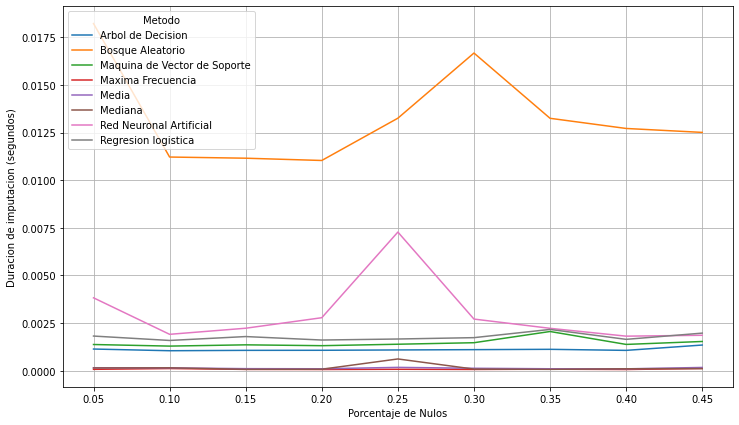

In [ ]:
classification_times.plot(grid=True, legend=True, figsize=(12,7))
plt.ylabel('Duracion de imputacion (segundos)')
plt.savefig('classification_times.eps')

### Resumen

In [ ]:
results.groupby(by='Metodo').mean().sort_values(by='Precision', ascending=False)[['Precision', 'Duracion']]

Precision  Duracion
Metodo                                           
Maquina de Vector de Soporte  98.048889  0.001467
Regresion logistica           97.701111  0.001781
Arbol de Decision             97.245556  0.001122
Bosque Aleatorio              97.245556  0.013335
Red Neuronal Artificial       92.917778  0.002963
Mediana                       39.166667  0.000164
Media                         39.123333  0.000136
Maxima Frecuencia             25.831111  0.000084